# Assignment 10 - Regression with Feature Selection

# Linear Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from mlxtend.evaluate import bias_variance_decomp

In [2]:
df_1 = pd.read_csv('C:/Users/Dell/Downloads/auto-mpg.csv')
df_1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [4]:
# Data 1
df_1['car name'].value_counts()

ford pinto                  6
toyota corolla              5
ford maverick               5
amc matador                 5
chevrolet chevette          4
                           ..
audi 100 ls                 1
honda accord lx             1
ford f108                   1
chevrolet cavalier wagon    1
datsun 810 maxima           1
Name: car name, Length: 305, dtype: int64

In [5]:
# Splitting the data in car name column and seperating the company name and model name
company = []

for i in df_1['car name']:
    company.append(i.split(" ")[0])

In [6]:
df_1['company'] = company
df_1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,company
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,ford torino,ford


In [7]:
df_1['company'].value_counts()

ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
vw                6
volvo             6
chrysler          6
renault           5
saab              4
opel              4
subaru            4
chevy             3
maxda             2
mercedes-benz     2
cadillac          2
bmw               2
mercedes          1
hi                1
chevroelt         1
nissan            1
triumph           1
capri             1
toyouta           1
vokswagen         1
Name: company, dtype: int64

In [8]:
df_1.drop('car name', axis = 1, inplace = True)
df_1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,company
0,18.0,8,307.0,130,3504,12.0,70,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,buick
2,18.0,8,318.0,150,3436,11.0,70,plymouth
3,16.0,8,304.0,150,3433,12.0,70,amc
4,17.0,8,302.0,140,3449,10.5,70,ford


In [9]:
# Creating dataframe of only numeric variables

df1_mod = df_1.drop('company', axis = 1)

In [10]:
# Checking correlation

df1_mod.corr()

,mpg,cylinders,displacement,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000


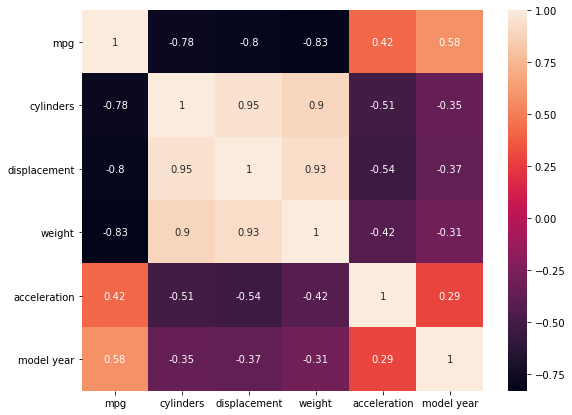

In [11]:

plt.figure(figsize = (9,7))
sns.heatmap(df1_mod.corr(), annot = True)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


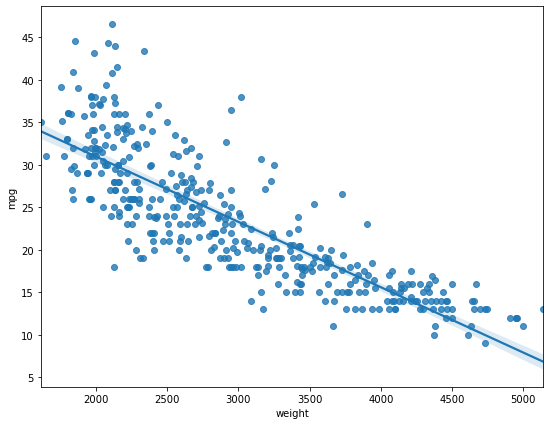

In [12]:
plt.figure(figsize = (9,7))
sns.regplot(df1_mod['weight'], df1_mod['mpg'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


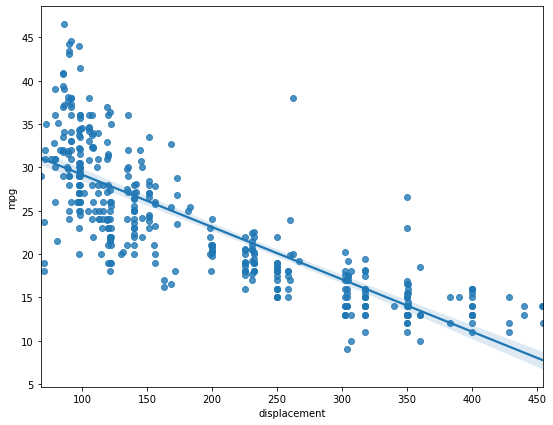

In [13]:
plt.figure(figsize = (9,7))
sns.regplot(df1_mod['displacement'], df1_mod['mpg'])
plt.show()

In [14]:
df1_mod.dtypes # there are null values in horsepower

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
dtype: object

In [15]:
df1_mod['horsepower'] = df1_mod['horsepower'].replace('?', '0')

In [16]:
df1_mod.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
dtype: int64

In [17]:
df1_mod['horsepower'] =pd.to_numeric(df1_mod['horsepower'])

In [18]:
# We select mpg as the target

x = df1_mod.drop('mpg', axis = 1)
y = df1_mod['mpg']

In [19]:
# Scaling data
x_scaled = StandardScaler().fit_transform(x)

In [20]:
# Splitting the data

x_tr, x_test, y_tr, y_test = train_test_split(x_scaled,y, test_size = 0.2)

In [21]:
# Linear regression

lm = LinearRegression().fit(x_tr, y_tr)
lm_pred = lm.predict(x_test)

In [29]:
# r2_score
r2_score(y_test, lm_pred)

0.7541376811684829

In [30]:
# RMse

mean_squared_error(y_test, lm_pred, squared = False)

3.7403917665072015

# Feature Selection

In [22]:
# Performing feature selection / data reduction (take the best features)

fs_mod = SelectKBest(f_regression,k=2).fit(x_scaled,y)

In [23]:
cols = fs_mod.get_support(indices = True)

In [24]:
x.iloc[:,cols]

,displacement,weight
0,307.0,3504
1,350.0,3693
2,318.0,3436
3,304.0,3433
4,302.0,3449
...,...,...
393,140.0,2790
394,97.0,2130
395,135.0,2295
396,120.0,2625


In [25]:
# Applying the feature selection on the x_scaled
x_best = fs_mod.transform(x_scaled)

In [26]:
x_tr, x_test, y_tr, y_test = train_test_split(x_best,y, test_size = 0.2)

In [27]:
# Applying regression using best features

lm_mod = LinearRegression().fit(x_tr, y_tr)

In [28]:
p = lm_mod.predict(x_test)

In [77]:
r2_score(y_test, p)

0.7538028275483695

In [79]:
mean_squared_error(y_test, p, squared = False)

3.8196239992735816

The r2-score for the linear regression model without feature selection is 0.75 and the r2-score for the linear regression model using the feature selection is also 0.75.


# PCA

In [29]:
# applying pca
pca_mod = PCA(n_components = 0.95)

In [30]:
x_pca = pca_mod.fit_transform(x_scaled)

In [31]:
pca_mod.explained_variance_ratio_

array([0.70336593, 0.13973395, 0.11234428])

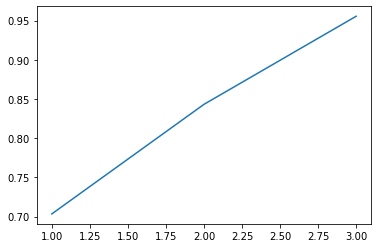

In [32]:
plt.plot(range(1,len(pca_mod.explained_variance_ratio_)+1),np.cumsum(pca_mod.explained_variance_ratio_))

In [33]:
# Split
x_tr, x_test, y_tr, y_test = train_test_split(x_pca, y, test_size = 0.2)

In [34]:
lm_pca_mod = LinearRegression().fit(x_tr, y_tr)

In [35]:
p_lmpca = lm_pca_mod.predict(x_test)

In [83]:
r2_score(y_test, p_lmpca)

0.7521476820705242

In [84]:
mean_squared_error(y_test, p_lmpca, squared = False)

4.3041759523783325

The model created using pca gives a r2-score of 0.75 but gives a greater RMSE than the previous two models. This value is greater than the value obtained using feature selection.

# Lasso Regression

In [36]:
x_tr, x_test, y_tr, y_test = train_test_split(x,y, test_size = 0.2)

In [37]:
lasso_mod = Lasso(alpha = 0.2).fit(x_tr, y_tr)

In [38]:
lasso_pred = lasso_mod.predict(x_test)

In [90]:
r2_score(y_test, lasso_pred)

0.8358924082022257

In [92]:
mean_squared_error(y_test, lasso_pred, squared = False)

3.4040858007341996

In [95]:
mse, bias, variance = bias_variance_decomp(lasso_mod,x_tr.values, y_tr.values, x_test.values, y_test.values, loss = 'mse', num_rounds = 200)

In [96]:
print("mse",mse)
print("bias",bias)
print("variance",variance)

mse 11.695814470623807
bias 11.488114486773085
variance 0.20769998385073762


We can see that the model built using Lasso regression gives the highest r2 score as compared to the previous models as well as lowest RMSE value.

<AxesSubplot:xlabel='displacement'>

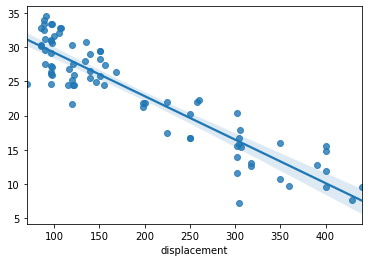

In [41]:
# Regression plot for Lasso model

sns.regplot(x_test['displacement'], lasso_pred)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

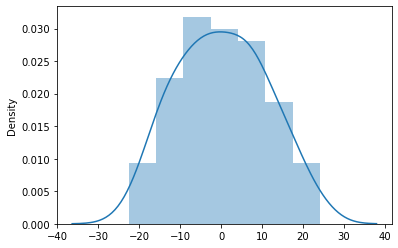

In [42]:
# Residual plot for linear reg model (1st model)

resid = np.array(y_test) - np.array(lm_pred)

sns.distplot(resid)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

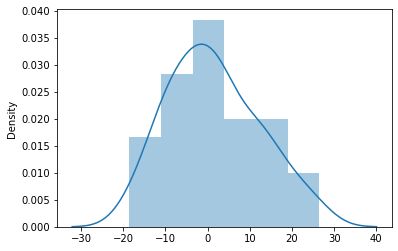

In [43]:
# residual plot for feature Selection 

resid = np.array(y_test) - np.array(p)

sns.distplot(resid)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

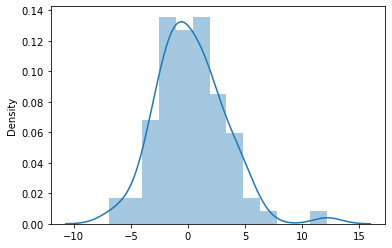

In [44]:
# residual Plot 

resid = np.array(y_test) - np.array(lasso_pred)

# For Lasso reg

sns.distplot(resid)

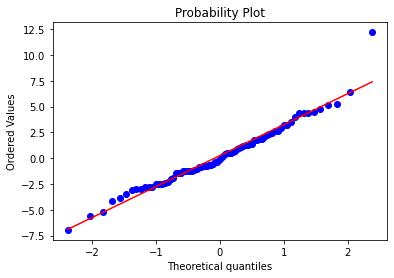

In [45]:
# Prob plot of residuals for lasso regression


import scipy
import pylab
scipy.stats.probplot(resid, dist = 'norm', plot = pylab)
pylab.show()